In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt

from msfm.utils.input_output import read_yaml

In [3]:
conf_dir = "../../configs/config.yaml"
conf = read_yaml(conf_dir)

mu = conf["analysis"]["shear_bias"]["multiplicative"]["mu"]
sigma = conf["analysis"]["shear_bias"]["multiplicative"]["sigma"]

print(mu)
print(sigma)

[-0.0063, -0.0198, -0.0241, -0.0369]
[0.0091, 0.0078, 0.0076, 0.0076]


In [4]:
normal = tfp.distributions.MultivariateNormalDiag(loc=mu, scale_diag=sigma)

Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2023-02-08 11:14:37.484292: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-08 11:14:37.484429: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
isinstance(normal, tfp.distributions.Distribution)

True

In [6]:
samples = normal.sample().numpy()
print(samples.shape)

(4,)


(10000, 4)


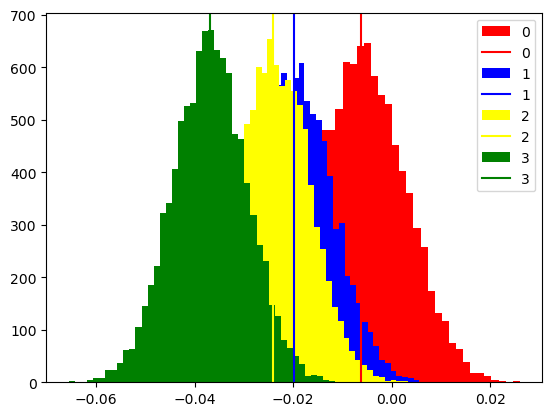

In [7]:
samples = normal.sample(10000).numpy()
print(samples.shape)

fig, ax = plt.subplots()

colors = iter(["red", "blue", "yellow", "green"])
for i_tomo in range(4):
    color = next(colors)
    ax.hist(samples[:,i_tomo], label=i_tomo, bins=50, color=color)
    ax.axvline(mu[i_tomo], label=i_tomo, color=color)

ax.legend()